<a href="https://colab.research.google.com/github/asrafulasf72/ml_lab/blob/main/221002172_CSE412_222D3_LabReport03_mlpFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [3]:
def sigmoid(x): return 1/(1+np.exp(-x))
def sigmoid_deriv(x): return x*(1-x)

In [4]:
def relu(x): return np.maximum(0,x)
def relu_deriv(x): return (x > 0).astype(float)

In [5]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [6]:
def precision(y_true, y_pred):
    TP = np.sum((y_true==1) & (y_pred==1))
    FP = np.sum((y_true==0) & (y_pred==1))
    return TP/(TP+FP+1e-9)

In [7]:
def recall(y_true, y_pred):
    TP = np.sum((y_true==1) & (y_pred==1))
    FN = np.sum((y_true==1) & (y_pred==0))
    return TP/(TP+FN+1e-9)

In [8]:
def f1_score(y_true, y_pred):
    p, r = precision(y_true,y_pred), recall(y_true,y_pred)
    return 2*p*r/(p+r+1e-9)

In [9]:
def roc_curve(y_true, y_prob):
    thresholds = np.linspace(0,1,100)
    tpr, fpr = [], []
    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        TP = np.sum((y_true==1)&(y_pred==1))
        FP = np.sum((y_true==0)&(y_pred==1))
        FN = np.sum((y_true==1)&(y_pred==0))
        TN = np.sum((y_true==0)&(y_pred==0))
        tpr.append(TP/(TP+FN+1e-9))
        fpr.append(FP/(FP+TN+1e-9))
    return fpr, tpr

Accuracy: 0.5
Precision: 0.49999999975
Recall: 0.49999999975
F1 Score: 0.49999999924999994


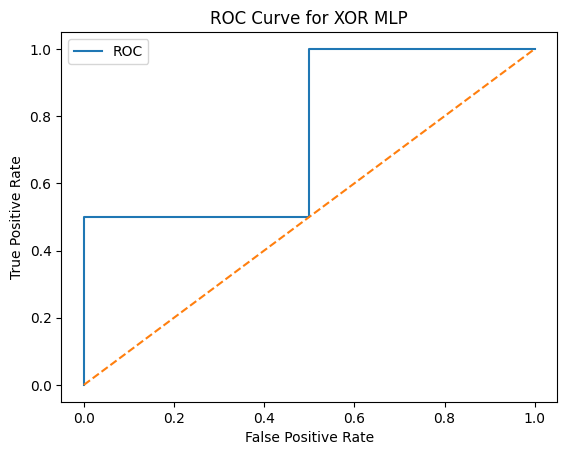

In [11]:
def train_mlp(X, y, hidden_activation="sigmoid", lr=0.1, epochs=5000):
    np.random.seed(42)
    W1 = np.random.randn(2,2)
    b1 = np.zeros((1,2))
    W2 = np.random.randn(2,1)
    b2 = np.zeros((1,1))

    if hidden_activation=="sigmoid":
        act, act_deriv = sigmoid, sigmoid_deriv
    else:
        act, act_deriv = relu, relu_deriv

    for epoch in range(epochs):

        z1 = X.dot(W1)+b1
        a1 = act(z1)
        z2 = a1.dot(W2)+b2
        a2 = sigmoid(z2)


        error = y - a2
        d2 = error * sigmoid_deriv(a2)
        dW2 = a1.T.dot(d2)
        db2 = np.sum(d2,axis=0,keepdims=True)

        d1 = d2.dot(W2.T)*act_deriv(a1)
        dW1 = X.T.dot(d1)
        db1 = np.sum(d1,axis=0,keepdims=True)


        W1 += lr*dW1
        b1 += lr*db1
        W2 += lr*dW2
        b2 += lr*db2

    return W1,b1,W2,b2

def predict(X, W1,b1,W2,b2, hidden_activation="sigmoid"):
    act = sigmoid if hidden_activation=="sigmoid" else relu
    z1 = X.dot(W1)+b1
    a1 = act(z1)
    z2 = a1.dot(W2)+b2
    return sigmoid(z2)


W1,b1,W2,b2 = train_mlp(X,y, hidden_activation="sigmoid", lr=0.1, epochs=5000)
y_prob = predict(X,W1,b1,W2,b2,"sigmoid")
y_pred = (y_prob>=0.5).astype(int)

print("Accuracy:", accuracy(y,y_pred))
print("Precision:", precision(y,y_pred))
print("Recall:", recall(y,y_pred))
print("F1 Score:", f1_score(y,y_pred))


fpr,tpr = roc_curve(y,y_prob)
plt.plot(fpr,tpr,label="ROC")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XOR MLP")
plt.legend()
plt.show()